# Empezar con la Segmentación de Imágenes Satelitales
## Introducción
Este cuaderno proporciona una guía para comenzar con el proyecto de segmentación de imágenes satelitales, centrándose en la configuración del entorno de desarrollo, la instalación de bibliotecas necesarias y la manipulación básica de imágenes utilizando TensorFlow y Keras. A lo largo de este cuaderno, te familiarizarás con:

- Configuración del Entorno: Uso de Google Colab para ejecutar código sin la necesidad de instalar bibliotecas localmente.
- Instalación de Bibliotecas: Instalación de las bibliotecas Python requeridas para el proyecto.
- Manipulación de Imágenes: Carga y manipulación de imágenes satelitales utilizando Rasterio, TensorFlow y Keras.

##Paso 1: Instalar Bibliotecas Necesarias
En la primera celda de tu cuaderno, instala las bibliotecas necesarias ejecutando el siguiente código:

In [3]:
!pip install sentinelsat numpy scipy jupyter matplotlib scikit-image scikit-learn wget requests imagecodecs tensorflow rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 56.4 MB/s eta 0:00:00


## Paso 2: Importar las Bibliotecas
En una nueva celda, importa las bibliotecas que usarás:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import tensorflow as tf
from tensorflow import keras
import rasterio
from rasterio.plot import show

## Paso 4: Descargar una Imagen de Ejemplo
Descarga una imagen de ejemplo en formato PNG:

In [5]:
!wget https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png -O satellite_image.png

--2024-05-31 22:59:16--  https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226933 (222K) [image/png]
Saving to: ‘satellite_image.png’

satellite_image.png 100%[===================>] 221.61K  --.-KB/s    in 0.05s   

2024-05-31 22:59:16 (4.46 MB/s) - ‘satellite_image.png’ saved [226933/226933]



## Paso 5: Cargar y Mostrar la Imagen Usando Rasterio
Carga y muestra la imagen utilizando Rasterio:

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


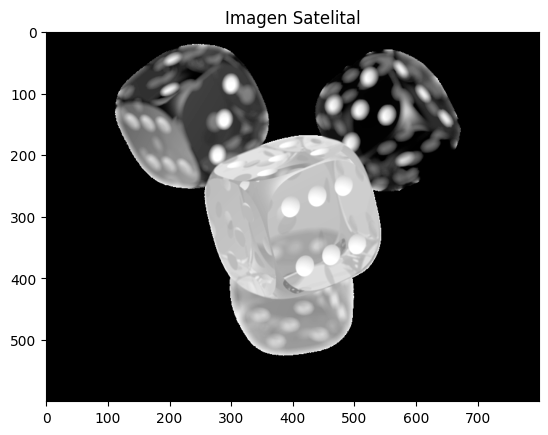

In [6]:
image_path = 'satellite_image.png'

with rasterio.open(image_path) as src:
    image = src.read(1)
    plt.imshow(image, cmap='gray')
    plt.title("Imagen Satelital")
    plt.show()

## Paso 6: Manipular la Imagen Usando TensorFlow y Keras
Vamos a crear una función para manipular la imagen. En este caso, redimensionaremos la imagen utilizando TensorFlow y Keras:

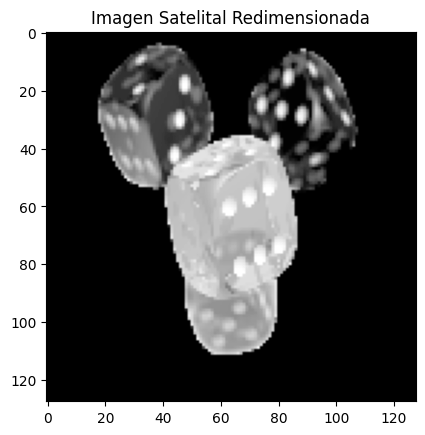

In [8]:
# Definir una función para redimensionar la imagen
def resize_image(image, target_size):
    # Añadir una dimensión adicional para representar el canal
    image_expanded = np.expand_dims(image, axis=-1)
    image_resized = tf.image.resize(image_expanded, target_size)
    return image_resized

# Redimensionar la imagen a 128x128 píxeles
image_resized = resize_image(image, (128, 128))

# Mostrar la imagen redimensionada
plt.imshow(image_resized.numpy().squeeze(), cmap='gray')
plt.title("Imagen Satelital Redimensionada")
plt.show()